# 7장. 다층 퍼셉트론

인공지능 학자들은 인공신경망을 개발하려면 XOR문제를 극복해야 했음 <br>
XOR 문제를 해결하기 위해서는 두 개의 퍼셉트론을 한 번에 계산할 수 있어야 함 <br>
→ 이를 위해 은닉층(숨어있는 층)을 만들어야 함

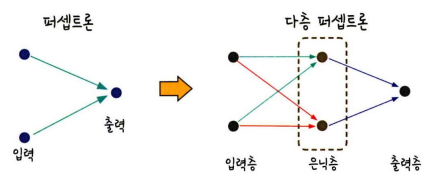

입력층과 은닉층의 그래프를 집어넣어보면 아래와 같음. <br>
은닉층이 좌표 평면을 왜곡시킴 <br>
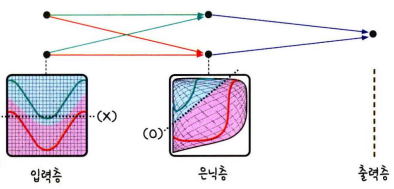

입력 값을 놓고 파란색과 빨간색의 영역을 구분 <br>
은닉층을 만들어 공간을 왜곡하면 두 영역을 가로지르는 선이 직선으로 바뀜

<hr>

## 1. 다층 퍼셉트론의 설계

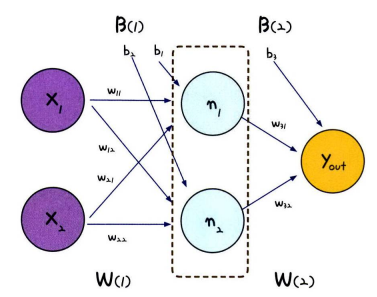

가운데 숨어있는 은닉층으로 퍼셉트론이 각각 자신의 가중치(w)와 바이어스(b) 값을 보내고，이 은닉층에서 모인 값이 한 번 더 시그모이드 함수를 이용해 최종 값으로 결과를 보냄. <br>
은닉층에 모이는 중간 정거장을 노드(node)라고 하며，여기서는 n1과 n2로 표현. <br>
n1과 n2의 값은 각각 단일 퍼셉트론의 값과 같음

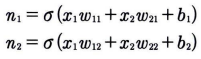

위 두 식의 결괏값이 출력층으로 보내집니다. 출력층에서는 역시 시그모이드 함수를 통해 y 값이 정해짐.

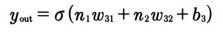

2차원 배열로 늘어놓으면 은닉층을 포함해 가중치 6개와 바이어스 3개가 필요함

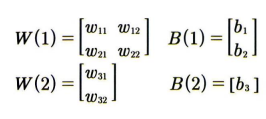

<hr>

## 2. XOR 문제의 해결

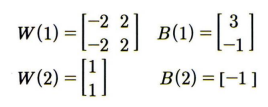

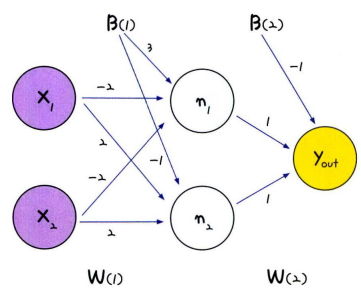

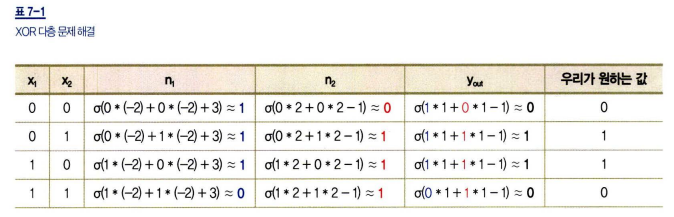

n1, n2, y를 구하는 공식에 차례로 대입하면 원하는 결과를 얻을 수 있음. <br>
숨어있는 두 개의 노드를 둔 다층 퍼셉트론을 통해 XOR 문제가 해결됨

<hr>

## 3. 코딩으로 XOR 문제 해결하기

NAND 게이트: 모두 1일 때 0을 출력하고, 하나라도 0이 아니면 1을 출력함. <br>
- AND 게이트의 정반대 값을 출력하는 방식.

In [1]:
import numpy as np

# 가중치와 바이어스
w11=np.array([-2,-2])
w12=np.array([2,2])
w2=np.array([1,1])
b1=3
b2=-1
b3=-1

In [2]:
def MLP(x, w, b): # 퍼셉트론 함수
  y=np.sum(w*x)+b
  if y<=0:
    return 0
  else:
    return 1

In [3]:
def NAND(x1, x2): # NAND 게이트
  return MLP(np.array([x1,x2]),w11,b1)

def OR(x1, x2): # OR 게이트
  return MLP(np.array([x1,x2]),w12,b2)

def AND(x1,x2): # AND 게이트
  return MLP(np.array([x1,x2]),w2,b3)

def XOR(x1,x2): # XOR 게이트
  return AND(NAND(x1,x2),OR(x1,x2))

In [4]:
if __name__=='__main__': # x1, x2값을 번갈아 대입하며 최종 값 출력
  for x in [(0,0),(1,0),(0,1),(1,1)]:
    y=XOR(x[0],x[1])
    print("입력 값: "+str(x)+"출력 값: "+str(y))

입력 값: (0, 0)출력 값: 0
입력 값: (1, 0)출력 값: 1
입력 값: (0, 1)출력 값: 1
입력 값: (1, 1)출력 값: 0


신경망: 은닉층을 여러 개 쌓아올려 복잡한 문제를 해결하는 과정